# Beta's en Security Market Line
___
In deze notebook worden de Beta's van de Finse aandelen gevisualiseerd, en wordt er aan de hand van deze Beta's een SML opgesteld. Om dit te doen worden eerst de benodigde packeges geïmporteerd.
___

In [1]:
library(readxl)
library(ggplot2)
install.packages("ggthemes") # Install 
library(ggthemes) # Load
install.packages("tidyverse")
install.packages("ggrepel")
library(ggrepel)

package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\s160015\AppData\Local\Temp\RtmpMpEXFE\downloaded_packages
package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\s160015\AppData\Local\Temp\RtmpMpEXFE\downloaded_packages
package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\s160015\AppData\Local\Temp\RtmpMpEXFE\downloaded_packages


Importeren van de data
---
___
Om de plot te kunnen maken, worden er twee dataframes gemaakt. als eerste wordt `beta_df` gemaakt. Hierin staan de aandelen codes, de verwachte rendementen en de Beta's van alle aandelen. Het tweede dataframe is `code_df`. Hierin staat de 1e collom van `beta_df`. `code_df` wordt gebruikt om de plot van labels te voorzien.
___

In [2]:
beta = read_xlsx("../Sourcedata/BETA.xlsx")
beta_df = data.frame(beta)

In [3]:
beta_df

Code,E.ri.,Beta
946457(PI)~E,0.002409486,-0.1748581
698783(PI)~E,0.002955322,-0.3243972
690351(PI)~E,-0.001108431,0.7889227
688027(PI)~E,-0.006647790,2.3065046
866457(PI)~E,0.009594083,-2.1431752
772959(PI)~E,0.016322100,-3.9864058
772967(PI)~E,0.005144319,-0.9241024
505967(PI)~E,0.008411766,-1.8192634
729882(PI)~E,-0.021706697,6.4320950
284310(PI)~E,0.002139971,-0.1010207


In [4]:
code_df = beta_df["Code"]
code_df

Code
946457(PI)~E
698783(PI)~E
690351(PI)~E
688027(PI)~E
866457(PI)~E
772959(PI)~E
772967(PI)~E
505967(PI)~E
729882(PI)~E
284310(PI)~E


Plotten
---
___
Met behulp van het package `ggplot2`, kunnen we een plot maken van de data, en de plot voorzien van de nodige informatie. In de volgende code is tevens het commando `stat_smooth()` toegevoegd, om een lijn door de datawolk te interpoleren. Aangezien de data punten een perfecte lijn vormen, is er geen standaard error vlak om de lijn heen. Dit komt overeen met de theorie uit de hoorcolleges waarin we kunnen vinden dat de beta's samen een lijn, namelijk de SML vormen. Echter is de SML in deze plot dalend...?
___

In [10]:
plot <- ggplot(beta_df, aes(Beta, E.ri.)) +
stat_smooth(method = 'lm') +
geom_point(col = "darkred") +
geom_label_repel(aes(label = code_df), size = 2) +
scale_y_continuous("Expected Rate of Returns (E(ri))",
                   limits = c(-0.025, 0.0175)) +
scale_x_continuous("Beta",
                   limits = c(-3.75, 6.5)) +
theme_bw() +
theme(panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                     colour = "lightblue"),
      panel.grid.minor = element_line(size = 0.1, linetype = 'dashed')) +
ggtitle("Security Market Line")

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_label_repel)."

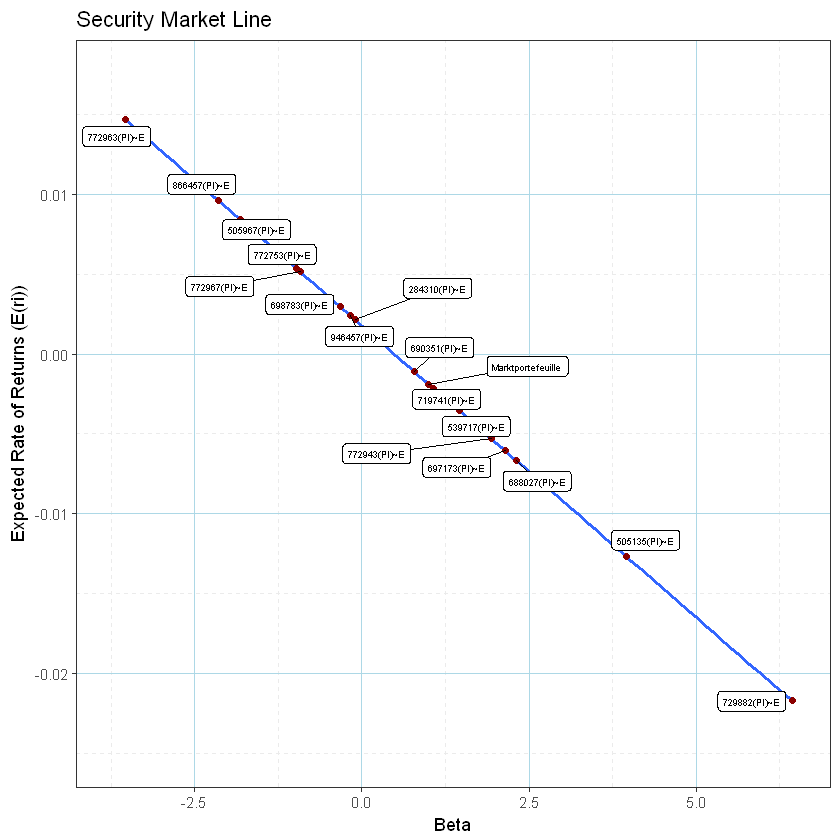

In [11]:
plot

In [12]:
ggsave("Security Market Line.jpg")

Saving 6.67 x 6.67 in image
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_label_repel)."